Рассмотрим $I = \int_{a}^{b} f(x)dx$.

Функция $f(x)$ называется интегрируемой по Риману, если:\
$I = \lim_{\delta x \to \ 0} \sum_{i=0}^{n} (x_{i+1} - x_i)(f(\xi_i))$, где

$\delta x = max_{i \in [0, n]}(x_{i+1} - x_i)$ - диаметр разбиения,\
$\{x_i\}_{i=0}^n$ - разбиение,\
$\xi_i \in [x_i; x_{i+1}]$

Также можно периписать формулу в силу свойства аддитивности интеграла Римана:\
$I = \sum_{i=0}^{n-1} \int_{x_i}^{x_{i+1}} f(x)dx$.\
Частичный интеграл под знаком суммы мы и будем рассматривать.

**Задание (численное интегрирование)**
Дана функция $f(x)$. Для неё необходимо:

1) Используя формулу прямоугольников вычислить приближенное значение интеграла $f(x)$ на отрезке $[a,b]$:
$$
I_{\text{пр}} \approx h \cdot \sum_{i=0}^{n-1} f\left(a + \left(i + \frac{1}{2}\right)h\right)
$$
2) Используя формулу трапеций вычислить приближенное значение интеграла $f(x)$ на отрезке $[a,b]$:
$$
I_{\text{тр}} \approx \frac{h}{2} \cdot \left[f(a) + f(b) + 2\sum_{i=1}^{n-1} f(a + i \cdot h)\right]
$$
3) Используя формулу Симпсона вычислить приближенное значение интеграла $f(x)$ на отрезке $[a,b]$:
$$
I_{\text{симп}} \approx \frac{h}{3} \cdot \left[f(a) + f(b) + 4\sum_{\substack{i=1 \\ i \ \text{нечёт.}}}^{n-1} f(a + i \cdot h) + 2\sum_{\substack{i=2 \\ i \ \text{чёт.}}}^{n-2} f(a + i \cdot h)\right]
$$
3) Исследовать зависимость ошибки вычислений от шага сетки.

**Функция для численного интегрирования** (вариант 23):
$$
f(x) = \cosh(x) \sin(x), \qquad 
x \in [-0.5,1]
$$


#### Результат точного интегрирования: `0.447463`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [2]:
def f(x):
    return np.cosh(x) * np.sin(x)

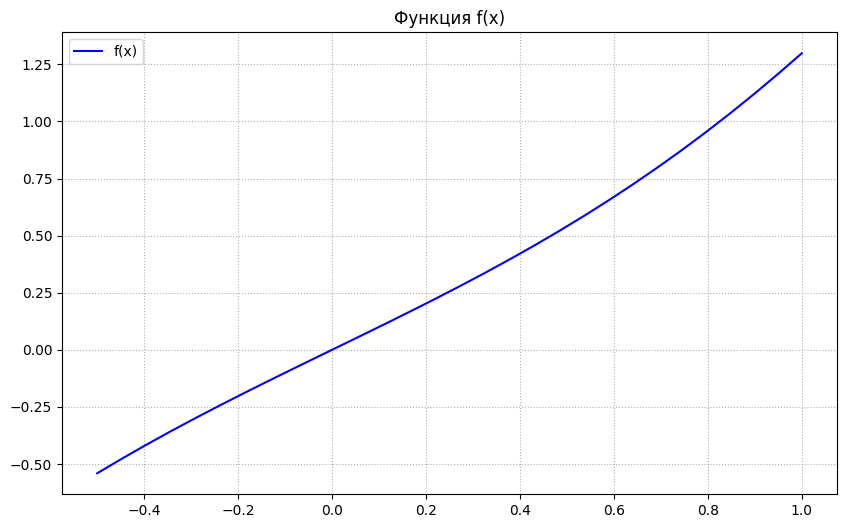

In [3]:
a = -0.5
b = 1
n = 30
x = np.linspace(a, b, n)

plt.figure(figsize=(10, 6))
plt.plot(x, f(x), color = 'b', label = 'f(x)')
plt.title('Функция f(x)')
plt.grid(True, ls = ':')
plt.legend()
plt.show()

In [4]:
def square(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)

    x_mid = (x[:-1] + x[1:]) / 2
    return h * np.sum(f(x_mid))

In [5]:
def trapezoidal_method(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    return h * (0.5 * (y[0] + y[-1]) + np.sum(y[1:-1]))

In [6]:
def simpson_method(f, a, b, n):
    if n % 2 != 0:
        n += 1
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)

    sum_odd = np.sum(y[1:-1:2])
    sum_even = np.sum(y[2:-1:2])

    return (h / 3) * (y[0] + y[-1] + 4 * sum_odd + 2 * sum_even)

Метод прямоугольников: 0.447339
Метод трапеций: 0.447711
Метод Симпсона: 0.447463
Точное значение: 0.447463


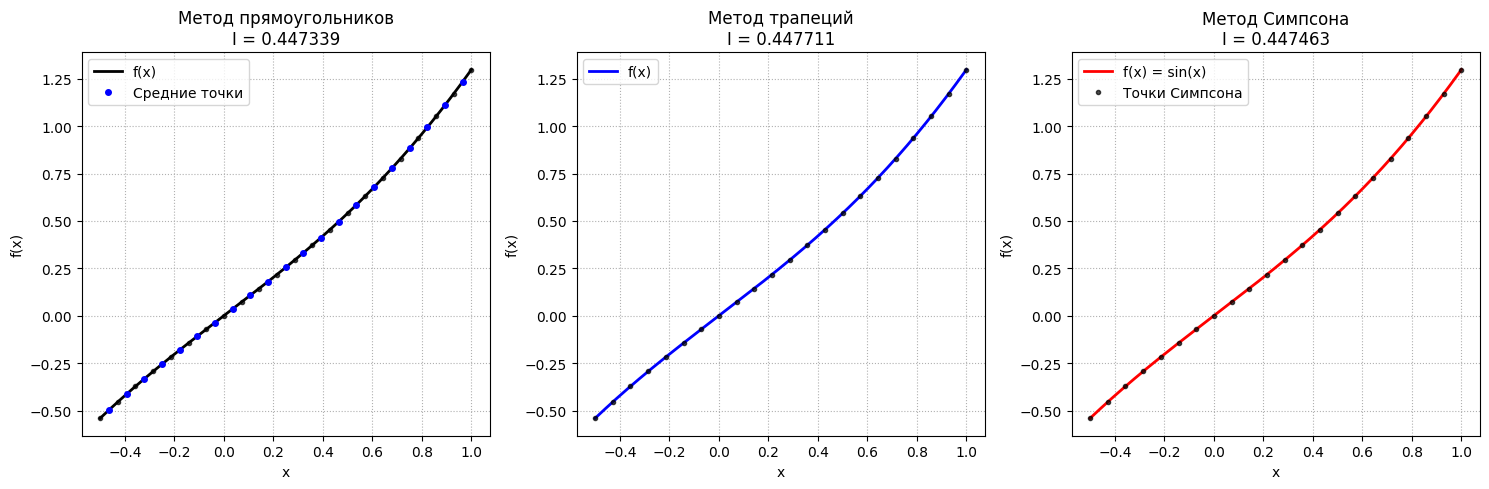

In [7]:
a = -0.5
b = 1
n = 21

# Вычисляем интегралы
I_square = square(f, a, b, n)
I_trapezoid = trapezoidal_method(f, a, b, n)
I_simpson = simpson_method(f, a, b, n)
I_origin = quad(f, a, b)[0]

print(f"Метод прямоугольников: {I_square:.6f}")
print(f"Метод трапеций: {I_trapezoid:.6f}")
print(f"Метод Симпсона: {I_simpson:.6f}")
print(f"Точное значение: {I_origin:.6f}")

# Создаем данные для графиков
x_vals = np.linspace(a, b, 1000)
y_vals = f(x_vals)

# Точки для методов
x_points = np.linspace(a, b, n+1)
y_points = f(x_points)

# Средние точки для метода прямоугольников
x_mid = (x_points[:-1] + x_points[1:]) / 2
y_mid = f(x_mid)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(x_vals, y_vals, 'k-', linewidth=2, label='f(x)')
plt.plot(x_points, y_points, 'ko', markersize=3, alpha=0.7)
plt.plot(x_mid, y_mid, 'bo', markersize=4, label='Средние точки')
plt.title(f'Метод прямоугольников\nI = {I_square:.6f}')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True, ls=':')

plt.subplot(1, 3, 2)
plt.plot(x_vals, y_vals, 'b-', linewidth=2, label='f(x)')
plt.plot(x_points, y_points, 'ko', markersize=3, alpha=0.7)
plt.title(f'Метод трапеций\nI = {I_trapezoid:.6f}')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True, ls=':')

plt.subplot(1, 3, 3)
plt.plot(x_vals, y_vals, 'r-', linewidth=2, label='f(x) = sin(x)')
plt.plot(x_points, y_points, 'ko', markersize=3, alpha=0.7, label='Точки Симпсона')

plt.title(f'Метод Симпсона\nI = {I_simpson:.6f}')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True, ls=':')

plt.tight_layout()
plt.show()

#### Вычисление ошибок методов.

In [8]:
a = -0.5
b = 1

I_origin = quad(f, a, b)[0]
I_sqr = square(f, a, b, n)
I_trap = trapezoidal_method(f, a, b, n)
I_simp = simpson_method(f, a, b, n)

sqr_error = np.abs(I_sqr - I_origin)
trap_error = np.abs(I_trap - I_origin)
simp_error = np.abs(I_simp - I_origin)

print(f"Ошибка для метода прямоугольников: {sqr_error}")
print(f"Ошибка для метода трапеций: {trap_error}")
print(f"Ошибка для метода Симпсона: {simp_error}")

Ошибка для метода прямоугольников: 0.0001240397003314797
Ошибка для метода трапеций: 0.0002480308776419138
Ошибка для метода Симпсона: 2.147361492510491e-07


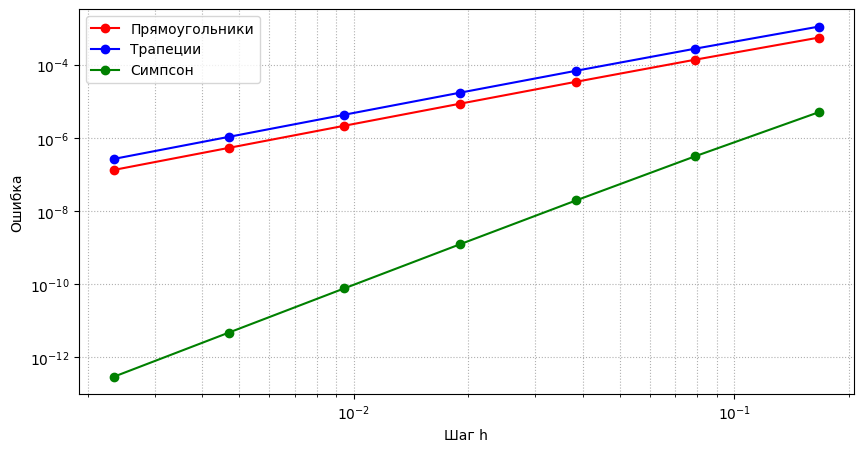

In [26]:
ns = [10, 20, 40, 80, 160, 320, 640]
errors_sqr = []
errors_trap = []
errors_simp = []

for n in ns:
    x = np.linspace(a, b, n)
    I_sqr = square(f, a, b, n)
    I_trap = trapezoidal_method(f, a, b, n)
    I_simp = simpson_method(f, a, b, n)
    
    errors_sqr.append(abs(I_origin - I_sqr))
    errors_trap.append(abs(I_origin - I_trap))
    errors_simp.append(abs(I_origin - I_simp))

h = [(b - a) / (n - 1) for n in ns]

plt.figure(figsize = (10, 5))

plt.loglog(h, errors_sqr, 'r-o', label='Прямоугольники')
plt.loglog(h, errors_trap, 'b-o', label='Трапеции')
plt.loglog(h, errors_simp, 'g-o', label='Симпсон')
plt.xlabel('Шаг h')
plt.ylabel('Ошибка')
plt.legend()
plt.grid(True, which="both", ls=":")
plt.show()

Прямоугольники (средние):

$$
E_{\text{rect}} \approx -\frac{(b-a)}{24}\, h^{2}\, f''(\xi)
$$

Трапеции:

$$
E_{\text{trap}} \approx -\frac{(b-a)}{12}\, h^{2}\, f''(\xi)
$$

Симпсон:

$$
E_{\text{simp}} \approx -\frac{(b-a)}{180}\, h^{4}\, f^{(4)}(\xi)
$$

In [11]:
!pip install sympy

In [10]:
import sympy as sp

In [11]:
n_values = np.array([10, 20, 40, 80, 160, 320, 640])
h_values = (b - a) / n_values

In [12]:
x = sp.symbols('x')
f_expr = sp.cosh(x) * sp.sin(x)

f2_expr = sp.diff(f_expr, x, 2)
f4_expr = sp.diff(f_expr, x, 4)

f = sp.lambdify(x, f_expr, 'numpy')
f2 = sp.lambdify(x, f2_expr, 'numpy')
f4 = sp.lambdify(x, f4_expr, 'numpy')

In [13]:
xs = np.linspace(a, b, 5000)
max_f2 = np.max(np.abs(f2(xs)))
max_f4 = np.max(np.abs(f4(xs)))

errors_rect_theory = (b - a) * h_values**2 * max_f2 / 24
errors_trap_theory = (b - a) * h_values**2 * max_f2 / 12
errors_simp_theory = (b - a) * h_values**4 * max_f4 / 180

In [14]:
print("\nМетод прямоугольников:")
print("n\t h\t\t Числ. ошибка\t Теор. оценка")
for i in range(len(n_values)):
    print(f"{n_values[i]}\t {h_values[i]:.4f}\t {errors_sqr[i]:.2e}\t {errors_rect_theory[i]:.2e}")

print("\nМетод трапеций:")
print("n\t h\t\t Числ. ошибка\t Теор. оценка")
for i in range(len(n_values)):
    print(f"{n_values[i]}\t {h_values[i]:.4f}\t {errors_trap[i]:.2e}\t {errors_trap_theory[i]:.2e}")

print("\nМетод Симпсона:")
print("n\t h\t\t Числ. ошибка\t Теор. оценка")
for i in range(len(n_values)):
    print(f"{n_values[i]}\t {h_values[i]:.4f}\t {errors_simp[i]:.2e}\t {errors_simp_theory[i]:.2e}")


Метод прямоугольников:
n	 h		 Числ. ошибка	 Теор. оценка
10	 0.1500	 5.48e-04	 1.80e-03
20	 0.0750	 1.37e-04	 4.50e-04
40	 0.0375	 3.42e-05	 1.12e-04
80	 0.0187	 8.54e-06	 2.81e-05
160	 0.0094	 2.14e-06	 7.03e-06
320	 0.0047	 5.34e-07	 1.76e-06
640	 0.0023	 1.33e-07	 4.39e-07

Метод трапеций:
n	 h		 Числ. ошибка	 Теор. оценка
10	 0.1500	 1.09e-03	 3.60e-03
20	 0.0750	 2.73e-04	 9.00e-04
40	 0.0375	 6.84e-05	 2.25e-04
80	 0.0187	 1.71e-05	 5.62e-05
160	 0.0094	 4.27e-06	 1.41e-05
320	 0.0047	 1.07e-06	 3.51e-06
640	 0.0023	 2.67e-07	 8.79e-07

Метод Симпсона:
n	 h		 Числ. ошибка	 Теор. оценка
10	 0.1500	 5.02e-06	 2.19e-05
20	 0.0750	 3.14e-07	 1.37e-06
40	 0.0375	 1.97e-08	 8.56e-08
80	 0.0187	 1.23e-09	 5.35e-09
160	 0.0094	 7.68e-11	 3.34e-10
320	 0.0047	 4.80e-12	 2.09e-11
640	 0.0023	 3.00e-13	 1.31e-12



#### Поправка Рунге

Для повышения точности численного интегрирования применяется **поправка Рунге (экстраполяция Рунге–Ричардсона)**:

$
I_{\text{Рунге}} = I_{h/2} + \frac{I_{h/2} - I_h}{2^p - 1},
$

где  
- $I_h$ — результат интегрирования с шагом $h$,  
- $I_{h/2}$ — результат с шагом вдвое меньше, 
- $p$ — порядок точности метода.

Для методов:  
- прямоугольников (средних) — $p = 2$,  
- трапеций — $p = 2$,  
- Симпсона — $p = 4$.

In [31]:
def runge(I_coarse, I_fine, p):
    return I_fine + (I_fine - I_coarse) / (2**p - 1)

a, b = -0.5, 1
rows = []
for n in n_values:
    I_mid_n = square(f, a, b, n)
    I_mid_2n = square(f, a, b, 2 * n)
    I_trap_n = trapezoidal_method(f, a, b, n)
    I_trap_2n = trapezoidal_method(f, a, b, 2 * n)
    I_simp_n = simpson_method(f, a, b, n)
    I_simp_2n = simpson_method(f, a, b, 2 * n)

    mid_runge = runge(I_mid_n, I_mid_2n, 2)
    trap_runge = runge(I_trap_n, I_trap_2n, 2)
    simp_runge = runge(I_simp_n, I_simp_2n, 4)

    rows.append({
        'n': n,
        'err_mid_n': abs(I_mid_n - I_origin),
        'err_mid_2n': abs(I_mid_2n - I_origin),
        'err_mid_runge': abs(mid_runge - I_origin),
        'err_trap_n': abs(I_trap_n - I_origin),
        'err_trap_2n': abs(I_trap_2n - I_origin),
        'err_trap_runge': abs(trap_runge - I_origin),
        'err_simp_n': abs(I_simp_n - I_origin),
        'err_simp_2n': abs(I_simp_2n - I_origin),
        'err_simp_runge': abs(simp_runge - I_origin),
    })

df = pd.DataFrame(rows)
print(f"I_exact (quad) = {I_exact:.12f}\n")
pd.set_option('display.float_format', '{:.3e}'.format)
display(df[['n','err_mid_n','err_mid_2n','err_mid_runge',
            'err_trap_n','err_trap_2n','err_trap_runge',
            'err_simp_n','err_simp_2n','err_simp_runge']])

I_exact (quad) = 0.447463083266



,n,err_mid_n,err_mid_2n,err_mid_runge,err_trap_n,err_trap_2n,err_trap_runge,err_simp_n,err_simp_2n,err_simp_runge
0,10,5.479e-04,1.368e-04,2.750e-07,1.095e-03,2.735e-04,3.143e-07,5.016e-06,3.143e-07,8.867e-10
1,20,1.368e-04,3.418e-05,1.720e-08,2.735e-04,6.835e-05,1.966e-08,3.143e-07,1.966e-08,1.376e-11
2,40,3.418e-05,8.543e-06,1.075e-09,6.835e-05,1.709e-05,1.229e-09,1.966e-08,1.229e-09,2.147e-13
3,80,8.543e-06,2.136e-06,6.721e-11,1.709e-05,4.272e-06,7.681e-11,1.229e-09,7.681e-11,3.386e-15
4,160,2.136e-06,5.340e-07,4.201e-12,4.272e-06,1.068e-06,4.801e-12,7.681e-11,4.801e-12,1.665e-16
5,320,5.340e-07,1.335e-07,2.625e-13,1.068e-06,2.670e-07,3.002e-13,4.801e-12,3.001e-13,1.110e-16
6,640,1.335e-07,3.337e-08,1.638e-14,2.670e-07,6.674e-08,1.876e-14,3.001e-13,1.887e-14,1.110e-16
